<a href="https://colab.research.google.com/github/itchyfeet-patient/Beautiful-Exploration/blob/master/Exploration_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7-6. 프로젝트: 고양이 수염 스티커 만들기 🐱 🐾

In [ ]:
import cv2
import dlib

print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 1. 스티커 구하기 or 만들기

스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다. 보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.

고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

마침 flaticon 사이트에 고양이 수염 이미지가 공개되어 있습니다.

고양이 수염 이미지  
(1) 고양이 수염 이미지를 다운로드 받아주세요.  
  
(2) 여러분의 셀카 이미지도 촬영해 주세요. (?)

---

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


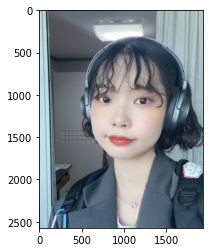

In [ ]:
my_image_path = '/content/drive/MyDrive/dataset/camera_sticker/images/jumi.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(510, 830) (1469, 1789)]]


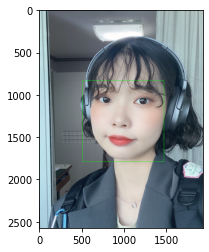

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

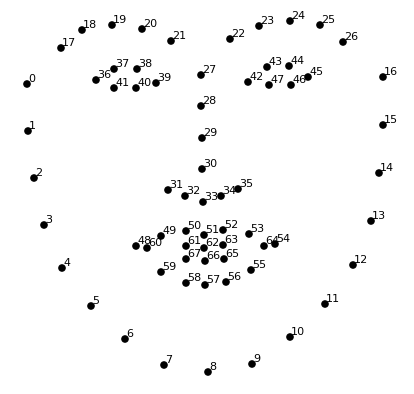

코 끝인 33 번보다 좋은 위치가 있을 거예요.

In [ ]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 /content/drive/MyDrive/dataset/camera_sticker/models
# !cd /content/drive/MyDrive/dataset/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
model_path = '/content/drive/MyDrive/dataset/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [ ]:
print(list_landmarks)

[[(605, 1025), (594, 1132), (599, 1241), (611, 1350), (636, 1457), (685, 1554), (750, 1641), (826, 1723), (920, 1759), (1033, 1763), (1157, 1721), (1274, 1657), (1372, 1574), (1436, 1465), (1471, 1342), (1503, 1217), (1526, 1088), (626, 925), (687, 878), (770, 873), (851, 891), (925, 930), (1061, 938), (1156, 897), (1261, 890), (1364, 920), (1436, 987), (973, 1054), (960, 1136), (946, 1219), (930, 1303), (867, 1367), (901, 1383), (938, 1396), (983, 1391), (1030, 1387), (692, 1040), (747, 1011), (814, 1020), (865, 1079), (804, 1087), (736, 1076), (1126, 1095), (1189, 1043), (1260, 1042), (1319, 1078), (1264, 1108), (1191, 1108), (789, 1497), (848, 1485), (898, 1473), (936, 1490), (981, 1483), (1050, 1511), (1136, 1537), (1046, 1585), (973, 1596), (925, 1594), (883, 1582), (839, 1553), (819, 1507), (894, 1520), (934, 1531), (979, 1532), (1102, 1540), (976, 1527), (931, 1526), (891, 1516)]]


(891, 1516)


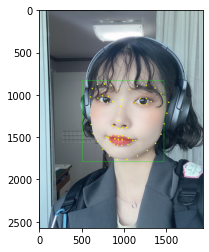

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 8, (0, 255, 255), -1)
print(point)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 4. 스티커 적용하기  

(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.  

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] 
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    #- dlib_rect.height()//2

(930, 1303)
(x,y) : (930,1303)
(w,h) : (960,960)


In [ ]:
sticker_path = '/content/drive/MyDrive/dataset/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(960, 960, 3)


In [ ]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (450,823)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (450,823)


In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


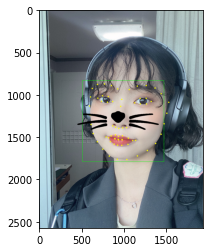

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

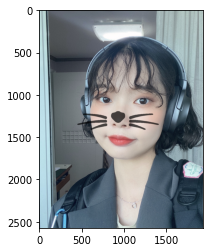

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.3,np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8), 0.7, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 5. 문제점 찾아보기  
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

>오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.  
>  
- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?  
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?  
- 실행 속도가 중요할까요?  
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?  

### 안경을 쓴 어두운 사진에 적용해보기

#### 사진 불러오기

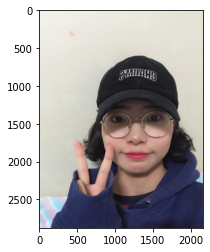

In [ ]:
my_image_path = '/content/drive/MyDrive/dataset/camera_sticker/images/jumi4.jpg'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### hog detector 선언


In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


#### bounding box 추출

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


#### 추출한 얼굴 영역 좌표

rectangles[[(741, 1125) (1891, 2275)]]


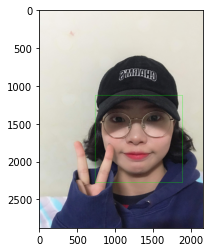

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### landmark model 불러오기

In [ ]:
model_path = '/content/drive/MyDrive/dataset/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


#### landmark 찾기

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


#### landmark 출력

(1246, 1907)


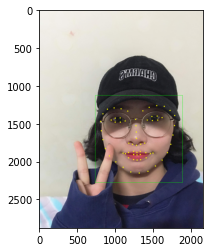

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 8, (0, 255, 255), -1)
print(point)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 좌표 확인

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] + dlib_rect.width()//20
    y = landmark[33][1] 
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    #- dlib_rect.height()//2

(1284, 1784)
(x,y) : (1341,1784)
(w,h) : (1151,1151)


In [ ]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (766,1209)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (766,1209)


In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


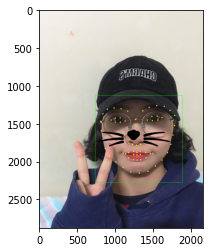

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 원본사진에 스티커 적용

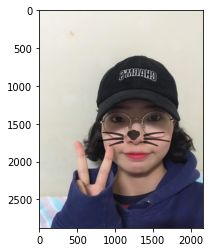

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area,0.3,np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8), 0.7, 0)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 🥅 평가 루브릭
| **평가문항** | **상세기준** | **학습결과** |
|---|---|:---:|
| 1. 자기만의 카메라앱 기능 구현을 완수하였다. | 원본에 스티커 사진이 정상적으로 합성되었다. | O |
| 2. 스티커 이미지를 정확한 원본 위치에 반영하였다. | 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다. | O |
| 3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다. | 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다. | O |

## ✍ 회고

1. 써보기만 하던 스티커 효과를 직접 만들수 있어서 좋았습니다.
2. cv에 한발짝 더 다가가게 된 계기가 되었습니다.
3. 마스크 쓴 사진이 요즘 (2년간) 많아서 마스크 쓴 사진도 눈만 인식되면 랜드마크를 찾아서 얼굴을 대강 알 수 있겠다고 생각해서 haarcascade classifier같은 방법을 여러가지로 시도해 봤는데 잘 안됐습니다. (ㅜㅠ)
4. 처음 시도했던 사진에 스티커 위치를 맞추고 안경끼고 상대적으로 어두운 다른 사진을 넣어 봤는데 똑같이 정 중앙에 코가 있는데.. 왜 정확하게 스티커가 위치하지 못하는지?..   
    가장 어려운 게 **일반적으로 다 들어맞는 모델**을 만드는 거라고 생각했습니다. 사진 하나하나는 무슨 수를 써서든 적합하게 스티커를 위치하게 할 수 있었지만, 매번 새롭게 만들어야 한다면 그건 **비효율적이고 경제성이 없으니까**.



### 참고문헌
addweighted :  https://ceuity.tistory.com/7